In [ ]:
import pandas as pd
import numpy as np

def augment_csv(
    input_path,
    output_path,
    scale_range=(0.9, 1.1),
    add_noise=False,
    noise_std=0.05
):
    """
    对CSV文件的时间序列数据进行增强，包含随机缩放和可选的噪声添加。

    参数:
    input_file (str): 输入CSV文件路径
    output_file (str): 输出增强后的CSV文件路径
    scale_range (tuple): 随机缩放因子的范围（例如 (0.8, 1.2)）
    add_noise (bool): 是否添加高斯噪声
    noise_std (float): 噪声标准差相对于特征标准差的比例（例如 0.05 表示5%）
    """
    # 读取数据
    df = pd.read_csv(input_path)
    time_col = df['time']
    features = df.drop(columns=['time'])
    
    # 随机缩放每个特征列
    scale_factors = np.random.uniform(
        low=scale_range[0],
        high=scale_range[1],
        size=features.shape[1]
    )
    augmented = features * scale_factors
    
    # 添加噪声
    if add_noise:
        stds = features.std().values
        noise = np.random.normal(
            loc=0,
            scale=noise_std * stds,
            size=features.shape
        )
        augmented += noise
    
    augmented=augmented.round(2)
    
    # 合并时间列并保存
    augmented_df = pd.concat([time_col, augmented], axis=1)
    augmented_df.to_csv(output_path, index=False)

In [ ]:
from model.BetaScheduler import *

linear_beta_scheduler = LinearBetaScheduler(timesteps=1000)
cosine_beta_scheduler = CosineBetaScheduler(timesteps=1000)

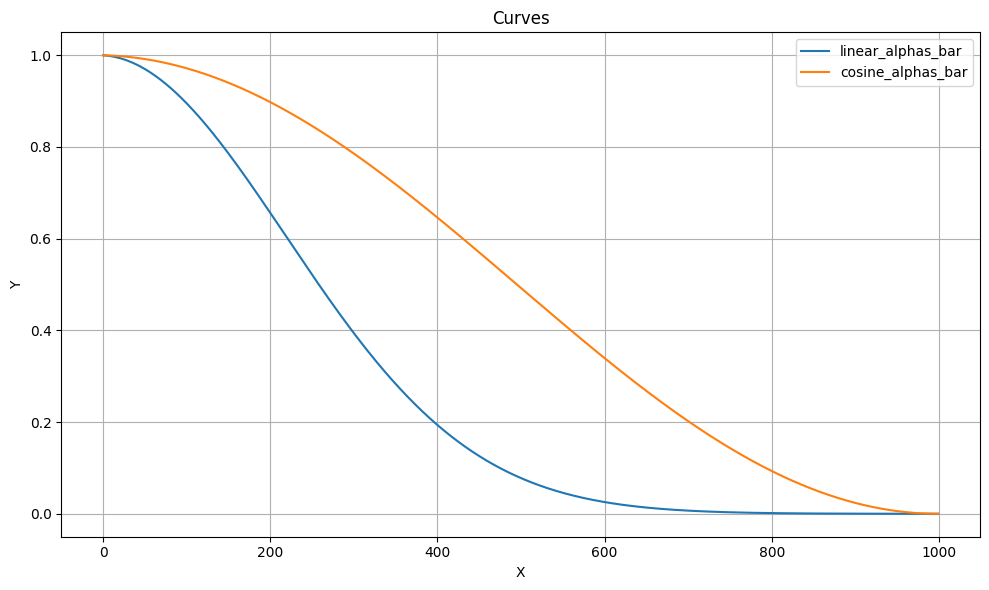

In [9]:
from utils.DataUtils.Visualization import plot_curves

linear_alphas_bar=linear_beta_scheduler.alphas_bar[1:]
cosine_alphas_bar=cosine_beta_scheduler.alphas_bar[1:]

group_01={
    "linear_alphas_bar":linear_alphas_bar,
    "cosine_alphas_bar":cosine_alphas_bar,
}


plot_curves(group_01)